In [1]:
using Pkg

In [2]:
Pkg.add("DifferentialEquations")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %=======>                                 ]  17.3 %34.4 %=====================>                   ]  51.6 %68.8 %===================================>     ]  86.0 % Resolving package versions...
 Installed ConsoleProgressMonitor ───── v0.1.2
 Installed FunctionWrappers ─────────── v1.1.1
 Installed DifferentialEquations ────── v6.10.1
 Installed DiffEqNoiseProcess ───────── v3.9.0
 Installed ChainRulesCore ───────────── v0.7.1
 Installed DelayDiffEq ──────────────── v5.23.0
 Installed Sundials ─────────────────── v3.8.3
 Installed DiffEqBase ───────────────── v6.20.0
 Installed TerminalLoggers ──────────── v0.1.1
 Installed LeftChildRightSiblingTrees ─ v0.1.2
 Installed ResettableStacks ─────────── v1.0.0
 Installed DiffEqPhysics ────────────── v3.5.0
 Installed DimensionalPlotRecipes ───── v1.1.0
 Inst

In [7]:
Pkg.add("Plots")

 Resolving package versions...
 Installed Showoff ─────── v0.3.1
 Installed PlotThemes ──── v1.0.1
 Installed Plots ───────── v0.29.8
 Installed FFMPEG ──────── v0.2.4
 Installed GeometryTypes ─ v0.8.1
 Installed PlotUtils ───── v0.6.4
 Installed Contour ─────── v0.5.2
 Installed Measures ────── v0.3.1
 Installed GR ──────────── v0.48.0
  Updating `~/.julia/environments/v1.0/Project.toml`
  [91a5bcdd] + Plots v0.29.8
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [d38c429a] + Contour v0.5.2
  [c87230d0] + FFMPEG v0.2.4
  [28b8d3ca] + GR v0.48.0
  [4d00f742] + GeometryTypes v0.8.1
  [442fdcdd] + Measures v0.3.1
  [ccf2f8ad] + PlotThemes v1.0.1
  [995b91a9] + PlotUtils v0.6.4
  [91a5bcdd] + Plots v0.29.8
  [992d4aef] + Showoff v0.3.1
  Building GR ────→ `~/.julia/packages/GR/yMV3y/deps/build.log`
  Building FFMPEG → `~/.julia/packages/FFMPEG/guN1x/deps/build.log`
  Building Plots ─→ `~/.julia/packages/Plots/vTdnV/deps/build.log`


In [2]:
using DifferentialEquations
using Plots

## Using the SIRS model

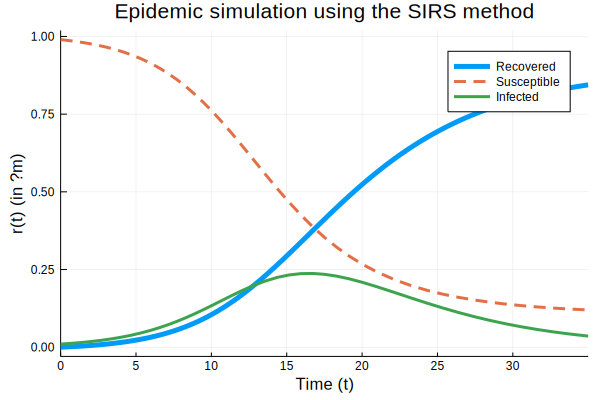

In [3]:
function sirs(;s0,  beta, gamma, r0)
    f(r,p,t) = gamma * (1 - r - s0 * exp(-beta * r / gamma))

    tspan = (0.0,35.0)
    prob = ODEProblem(f,r0,tspan)
    r = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)   # Fifth order Tsitouras method
    s = s0 * exp.( -beta .* r ./ gamma)
    x = 1 .- s .- r

    plot(r,linewidth=5,title="Epidemic simulation using the SIRS method",
         xaxis="Time (t)",yaxis="r(t) (in μm)",label="Recovered") # legend=false
    plot!(r.t, s,lw=3,ls=:dash,label="Susceptible")
    plot!(r.t, x,lw=3,label="Infected")
end

sirs(s0 = 0.99, beta = 0.5, gamma = 0.2, r0 = 0.0001)

## Using the SIS model

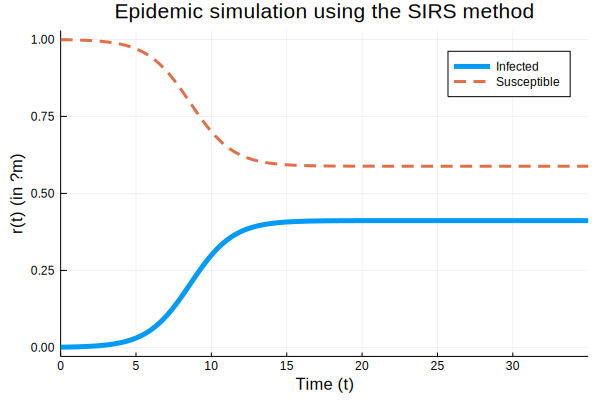

In [63]:
function sis(;x0,  beta)
    f(x,p,t) = (beta - x - beta * x) * x

    tspan = (0.0,35.0)
    prob = ODEProblem(f,x0,tspan)
    x = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)   # Fifth order Tsitouras method
    
    plot(x,linewidth=5,title="Epidemic simulation using the SIRS method",
         xaxis="Time (t)",yaxis="r(t) (in μm)",label="Infected") # legend=false
    plot!(x.t,  1 .- x,lw=3,ls=:dash,label="Susceptible")
    
end

sis(x0 = 0.001, beta = 0.7)